In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.1.3
3.4.2


In [3]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation2 import get_model_for_problem_formulation, sum_over, sum_over_time

In [4]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(1)

In [5]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [6]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [7]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('Expected Annual Damage', variable_name=('A.1_Expected Annual Damage', 'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage', 'A.5_Expected Annual Damage'), function=<function sum_over at 0x15f2e36a0>)
ScalarOutcome('RfR Total Costs', variable_name=('RfR Total Costs',), function=<function sum_over at 0x15f2e36a0>)


In [8]:
# running the model through EMA workbench
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=100, policies=275)

[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 100 scenarios * 275 policies * 1 model(s) = 27500 experiments
100%|████████████████████████████████████| 27500/27500 [26:47<00:00, 17.10it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [9]:
# observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['Expected Annual Damage', 'RfR Total Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,23,207.218323,1.0,0.010924,95.232276,1.0,0.109641,221.981506,1.5,0.343694,...,0,2,2,0,2,8,2,275,0,dikesnet
1,106,251.271687,10.0,0.474708,160.076650,1.0,0.317126,250.609619,1.0,0.845386,...,0,2,2,0,2,8,2,276,0,dikesnet
2,52,124.883132,10.0,0.327147,215.948518,1.5,0.742106,294.349549,1.5,0.751370,...,0,2,2,0,2,8,2,277,0,dikesnet
3,77,291.476515,1.0,0.573771,59.867650,10.0,0.587280,228.468021,1.5,0.361920,...,0,2,2,0,2,8,2,278,0,dikesnet
4,5,248.492117,1.5,0.900606,272.119852,1.5,0.720665,64.454205,1.0,0.707424,...,0,2,2,0,2,8,2,279,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27495,98,260.770640,1.0,0.856675,287.658272,1.5,0.068724,147.330570,10.0,0.736777,...,2,1,2,0,7,5,4,370,274,dikesnet
27496,92,244.314474,10.0,0.486074,120.163124,1.0,0.768702,322.769729,10.0,0.660104,...,2,1,2,0,7,5,4,371,274,dikesnet
27497,108,234.078977,1.0,0.761057,73.110605,10.0,0.831266,179.554257,1.0,0.799128,...,2,1,2,0,7,5,4,372,274,dikesnet
27498,13,329.473993,10.0,0.034372,243.204323,1.5,0.992060,253.192251,1.0,0.937181,...,2,1,2,0,7,5,4,373,274,dikesnet


In [10]:
experiments.columns

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat', 'scenario', 'policy', 'model'],
      dtype='object')

In [11]:
# only works because we have scalar outcomes
outcomes_pd = pd.DataFrame(outcomes)
outcomes_pd

,Expected Annual Damage,RfR Total Costs
0,1.410571e+07,1.542000e+09
1,1.075449e+07,1.542000e+09
2,4.360900e+06,1.542000e+09
3,4.035496e+06,1.542000e+09
4,2.285967e+06,1.542000e+09
...,...,...
27495,2.783730e+07,1.420800e+09
27496,3.192516e+07,1.420800e+09
27497,0.000000e+00,1.420800e+09
27498,3.005972e+07,1.420800e+09


In [12]:
tot = experiments.join(outcomes_pd)
tot


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model,Expected Annual Damage,RfR Total Costs
0,23,207.218323,1.0,0.010924,95.232276,1.0,0.109641,221.981506,1.5,0.343694,...,2,0,2,8,2,275,0,dikesnet,1.410571e+07,1.542000e+09
1,106,251.271687,10.0,0.474708,160.076650,1.0,0.317126,250.609619,1.0,0.845386,...,2,0,2,8,2,276,0,dikesnet,1.075449e+07,1.542000e+09
2,52,124.883132,10.0,0.327147,215.948518,1.5,0.742106,294.349549,1.5,0.751370,...,2,0,2,8,2,277,0,dikesnet,4.360900e+06,1.542000e+09
3,77,291.476515,1.0,0.573771,59.867650,10.0,0.587280,228.468021,1.5,0.361920,...,2,0,2,8,2,278,0,dikesnet,4.035496e+06,1.542000e+09
4,5,248.492117,1.5,0.900606,272.119852,1.5,0.720665,64.454205,1.0,0.707424,...,2,0,2,8,2,279,0,dikesnet,2.285967e+06,1.542000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27495,98,260.770640,1.0,0.856675,287.658272,1.5,0.068724,147.330570,10.0,0.736777,...,2,0,7,5,4,370,274,dikesnet,2.783730e+07,1.420800e+09
27496,92,244.314474,10.0,0.486074,120.163124,1.0,0.768702,322.769729,10.0,0.660104,...,2,0,7,5,4,371,274,dikesnet,3.192516e+07,1.420800e+09
27497,108,234.078977,1.0,0.761057,73.110605,10.0,0.831266,179.554257,1.0,0.799128,...,2,0,7,5,4,372,274,dikesnet,0.000000e+00,1.420800e+09
27498,13,329.473993,10.0,0.034372,243.204323,1.5,0.992060,253.192251,1.0,0.937181,...,2,0,7,5,4,373,274,dikesnet,3.005972e+07,1.420800e+09


[MainProcess/INFO] no time dimension found in results


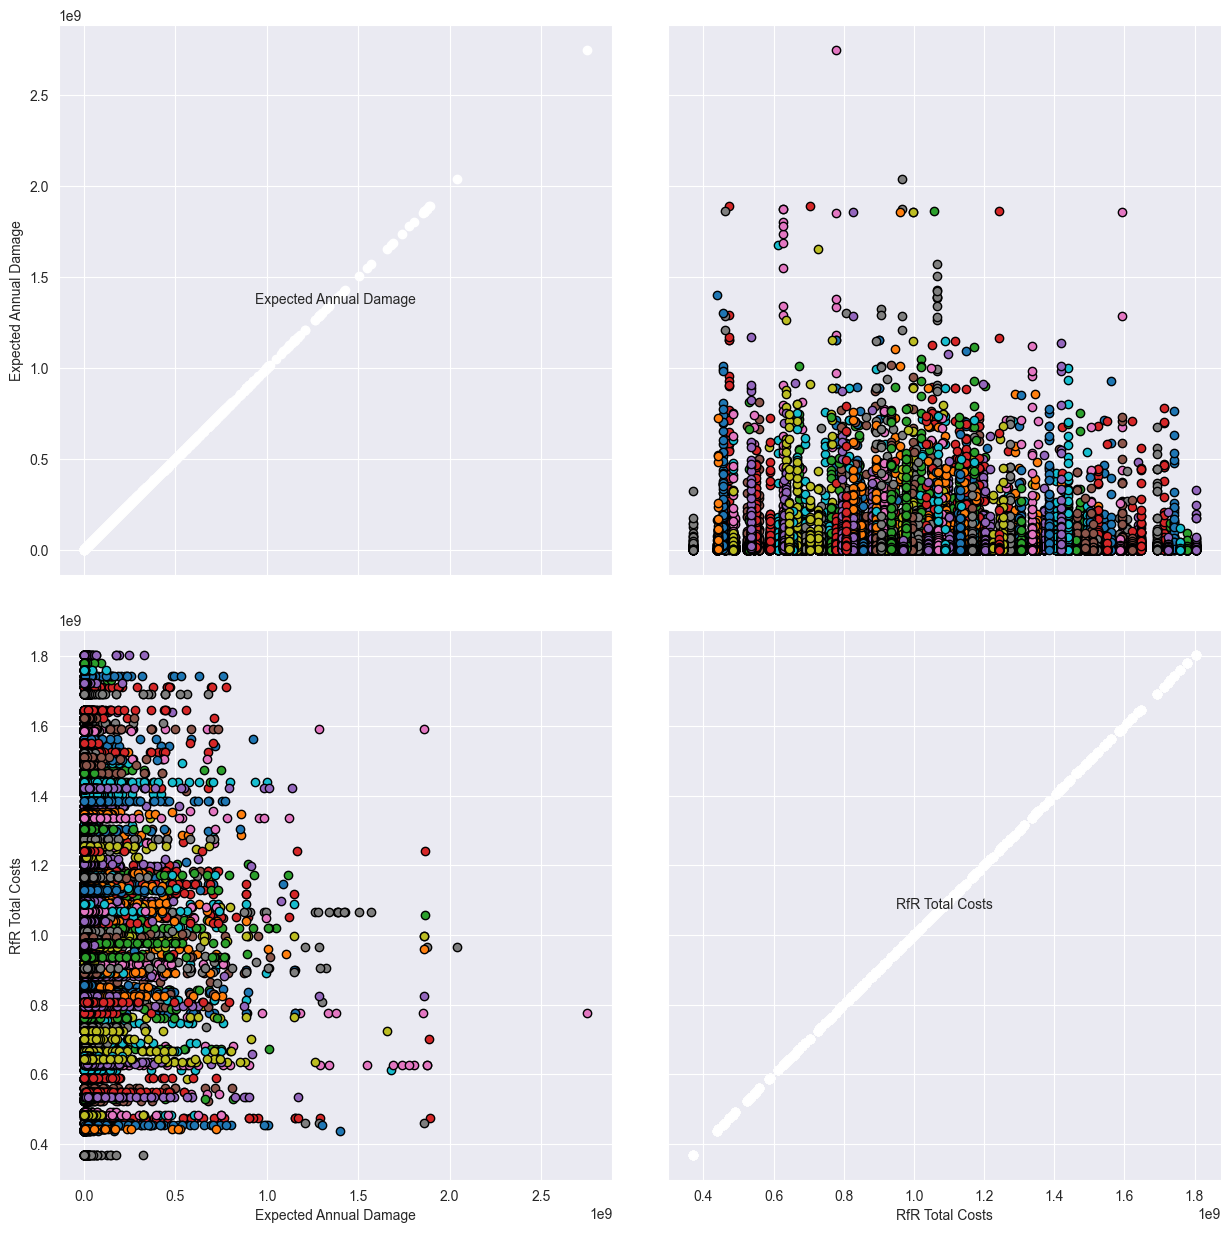

In [13]:
from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(tot, outcomes, group_by='policy',legend=False)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

In [14]:
tot_policy = tot.groupby('policy').mean(numeric_only=True)
tot_policy.sort_values(by=tot_policy.columns[-1], ascending=True, inplace=True)
tot_policy

/var/folders/cq/_rbxzkq17533m5qdt1c__dyw0000gn/T/ipykernel_53874/255886294.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tot_policy = tot.groupby('policy').mean(numeric_only=True)


,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.2_Bmax,A.2_pfail,A.3_Bmax,A.3_pfail,A.4_Bmax,A.4_pfail,A.5_Bmax,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,Expected Annual Damage,RfR Total Costs
policy,,,,,,,,,,,,,,,,,,,,,
137,66.01,190.182562,0.49955,190.154806,0.500031,190.12868,0.50012,190.015668,0.499961,190.133124,...,9.0,1.0,2.0,3.0,8.0,9.0,1.0,4.0,2.214116e+07,3.697000e+08
10,66.01,190.182562,0.49955,190.154806,0.500031,190.12868,0.50012,190.015668,0.499961,190.133124,...,3.0,10.0,1.0,5.0,10.0,7.0,7.0,1.0,1.944121e+07,4.387000e+08
271,66.01,190.182562,0.49955,190.154806,0.500031,190.12868,0.50012,190.015668,0.499961,190.133124,...,10.0,5.0,1.0,3.0,7.0,0.0,4.0,1.0,5.704477e+07,4.423000e+08
200,66.01,190.182562,0.49955,190.154806,0.500031,190.12868,0.50012,190.015668,0.499961,190.133124,...,10.0,4.0,1.0,8.0,0.0,0.0,2.0,3.0,2.538391e+08,4.560000e+08
167,66.01,190.182562,0.49955,190.154806,0.500031,190.12868,0.50012,190.015668,0.499961,190.133124,...,5.0,4.0,6.0,6.0,7.0,9.0,4.0,4.0,6.045807e+07,4.619000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,66.01,190.182562,0.49955,190.154806,0.500031,190.12868,0.50012,190.015668,0.499961,190.133124,...,8.0,6.0,10.0,0.0,9.0,7.0,10.0,3.0,7.808698e+06,1.730800e+09
80,66.01,190.182562,0.49955,190.154806,0.500031,190.12868,0.50012,190.015668,0.499961,190.133124,...,8.0,9.0,9.0,10.0,2.0,2.0,10.0,3.0,8.124664e+07,1.742800e+09
159,66.01,190.182562,0.49955,190.154806,0.500031,190.12868,0.50012,190.015668,0.499961,190.133124,...,10.0,1.0,5.0,4.0,7.0,5.0,2.0,4.0,4.410616e+06,1.759800e+09


In [15]:
# code blok mean/max/min
# Zet de outcomes om naar een dataframe
outcomes_df = pd.DataFrame.from_dict(outcomes)

# Selecteer de juiste kolommen (kosten en schade)
columns = ["RfR Total Costs", "Expected Annual Damage"]

# Bereken mean, max, min
summary = outcomes_df[columns].agg(['mean', 'max', 'min'])

# Zet kosten om naar miljoenen euro (zoals in voorbeeldtabel)
summary.loc[:, "RfR Total Costs"] = summary["RfR Total Costs"] / 1e6
summary.loc[:, "Expected Annual Damage"] = summary["Expected Annual Damage"] / 1e6

# Rond af op 2 decimalen
summary = summary.round(2)

# Herbenoem de rijen voor helderheid
summary.index = ['Mean', 'Maximum', 'Minimum']
summary

,RfR Total Costs,Expected Annual Damage
Mean,1064.0,44.82
Maximum,1804.2,2750.66
Minimum,369.7,0.00


In [22]:
summary

,RfR Total Costs,Expected Annual Damage
Mean,1064.0,44.82
Maximum,1804.2,2750.66
Minimum,369.7,0.00


In [16]:
# defining specific policies
# for example, policy 1 is about extra protection in upper boundary
# policy 2 is about extra protection in lower boundary
# policy 3 is extra protection in random locations


def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}


policies = [
    Policy(
        "policy 1",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "0_RfR 1": 1, "0_RfR 2": 1, "A.1_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 2",
        **dict(
            get_do_nothing_dict(),
            **{"4_RfR 0": 1, "4_RfR 1": 1, "4_RfR 2": 1, "A.5_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 3",
        **dict(
            get_do_nothing_dict(),
            **{"1_RfR 0": 1, "2_RfR 1": 1, "3_RfR 2": 1, "A.3_DikeIncrease 0": 5}
        )
    ),
]

In [17]:
# pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 100 scenarios * 3 policies * 1 model(s) = 300 experiments
100%|████████████████████████████████████████| 300/300 [00:14<00:00, 20.08it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [18]:
experiments, outcomes = results

In [19]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

,Expected Annual Damage,RfR Total Costs
0,4.538480e+08,253800000.0
1,1.896603e+09,253800000.0
2,2.356843e+08,253800000.0
3,2.771811e+08,253800000.0
4,1.941775e+09,253800000.0
...,...,...
295,1.137679e+08,369700000.0
296,7.068802e+07,369700000.0
297,1.781323e+08,369700000.0
298,1.258754e+08,369700000.0


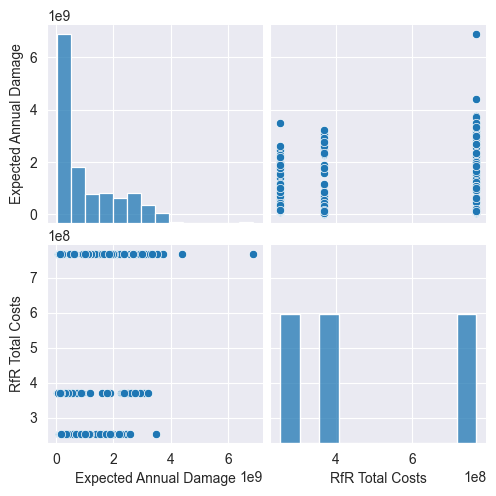

In [20]:
sns.pairplot(pd.DataFrame.from_dict(outcomes))
plt.show()

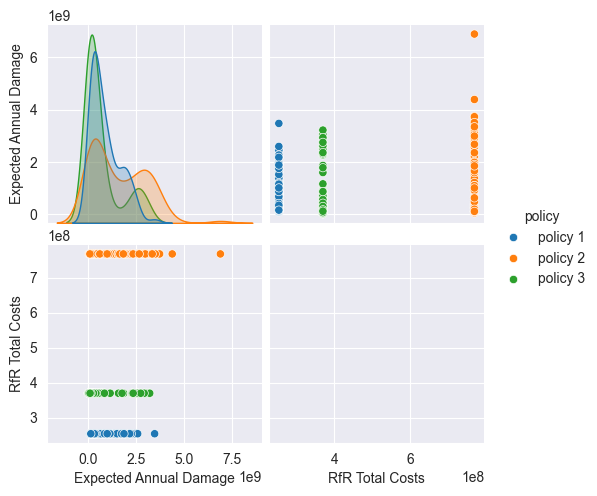

In [21]:
policies = experiments['policy']

data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

sns.pairplot(data, hue='policy',  vars=outcomes.keys(), )
plt.show()

In [25]:
from ema_workbench import save_results

# Zorg ervoor dat 'results' bestaat in je notebook:
# results = perform_experiments(...)
# experiments, outcomes = results

save_results(results, 'dike_open_exploration_results.tar.gz')

[MainProcess/INFO] results saved successfully to /Users/evalievanoijen/PycharmProjects/group25_mbdm/final assignment/dike_open_exploration_results.tar.gz
